### Sample image processing (Images are numpy arrays!)
Investigating a subset of the images in the [skyline12](http://people.cs.umass.edu/~smaji/projects/skylineParsing/index.html) dataset.  
The data is located in the `skyline12_subset` directory in the same folder as this notebook.

In [1]:
# imports
import numpy as np
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# location of the images and labels
root = 'skyline12_subset/'
img_folder = 'images/'
lbl_folder = 'labels/'

In [3]:
# read in an image of interest
city = 'Chicago/'
fname = '1_1.jpg'
path_img = ''.join([root, img_folder, city, fname])
print(path_img)
img = skimage.io.imread(path_img)

skyline12_subset/images/Chicago/1_1.jpg


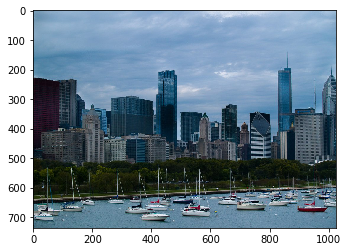

In [4]:
# plot the image
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
ax.imshow(img);

In [5]:
# what is it's shape?
img.shape

(736, 1024, 3)

In [6]:
# what is it's type?
type(img)

imageio.core.util.Array

In [7]:
# what do the values look like (investigate row 0, column 0, all pixel intensities)
img[0,0,:]

Array([133, 165, 188], dtype=uint8)

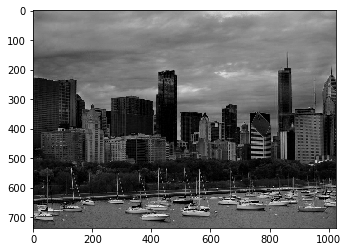

In [8]:
# plot the first channel (red)
plt.imshow(img[:,:,0], cmap='gray');

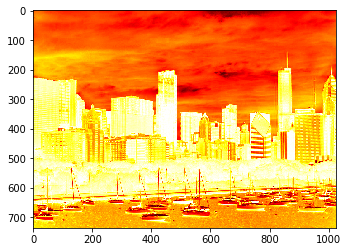

In [9]:
# could use a different colormap to plot the same channel
plt.imshow(img[:,:,0], cmap='hot_r');
# it's the same data!

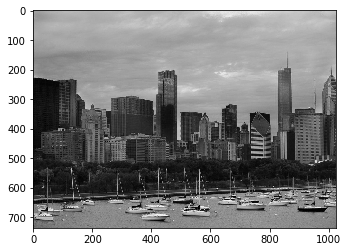

In [10]:
# plot the second channel (green)
plt.imshow(img[:,:,1], cmap='gray');

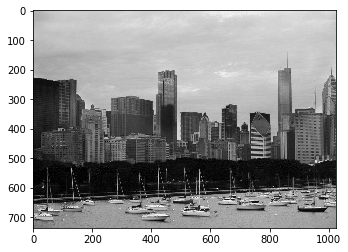

In [11]:
# plot the third channel (blue)
plt.imshow(img[:,:,2], cmap='gray');

### Red, green, blue channels often aren't helpful capturing where we think an image has a certain color.
Try the hue-saturation-value [HSV](https://en.wikipedia.org/wiki/HSL_and_HSV) color space.  Blue has a [hue between 219 and 240](http://www.workwithcolor.com/blue-color-hue-range-01.htm).

In [12]:
from skimage import color

In [13]:
img_hsv = color.rgb2hsv(img)

/home/frank/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/frank/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


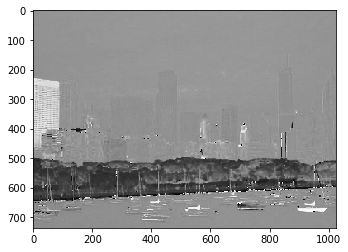

In [14]:
# plot the first channel (H)
plt.imshow(img_hsv[:,:,0], cmap='gray');
# the trees and tree gardens are easy to find in the resulting image

### Cropping and rotating

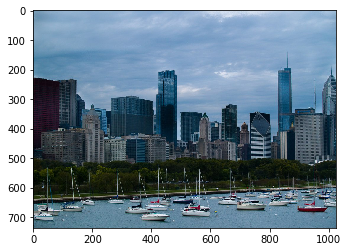

In [15]:
plt.imshow(img);

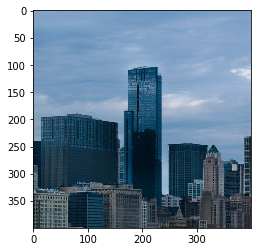

In [16]:
img_cropped = img[100:500, 250:650, :]
plt.imshow(img_cropped);

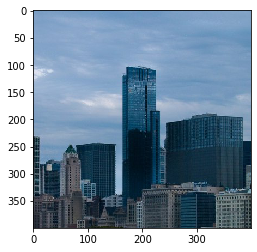

In [17]:
img_cropped_lr = np.fliplr(img_cropped)
plt.imshow(img_cropped_lr);

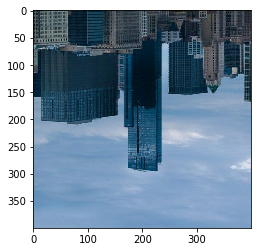

In [18]:
img_cropped_up = np.flipud(img_cropped)
plt.imshow(img_cropped_up);

### Rotating using skimage

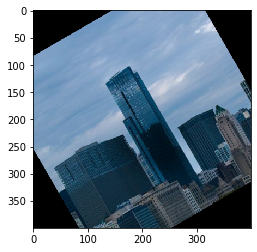

In [19]:
angle = 30 
img_cropped_ang = skimage.transform.rotate(img_cropped, 
                                          angle, 
                                          resize=False, 
                                          center=None, 
                                          order=1, 
                                          mode='constant', 
                                          cval=0, 
                                          clip=True, 
                                          preserve_range=False)
plt.imshow(img_cropped_ang);

#### Corners are clipped, good thing we have a bigger image to start with...

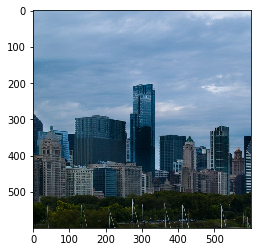

In [20]:
border = 100
img_cropped_bigger_border = img[100-border:500+border, 250-border:650+border, :]
plt.imshow(img_cropped_bigger_border);

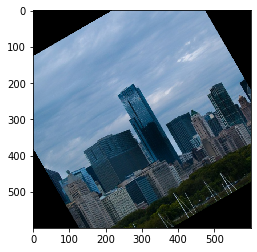

In [21]:
angle = 30 
img_cropped_ang = skimage.transform.rotate(img_cropped_bigger_border, 
                                          angle, 
                                          resize=False, 
                                          center=None, 
                                          order=1, 
                                          mode='constant', 
                                          cval=0, 
                                          clip=True, 
                                          preserve_range=False)
plt.imshow(img_cropped_ang);

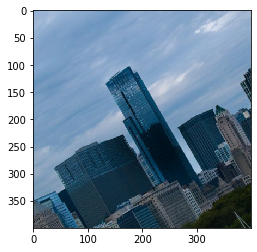

In [22]:
row_start = 100
col_start = 100
side = 400
img_cropped_2 = img_cropped_ang[row_start:row_start + side, col_start:col_start + side, :]
plt.imshow(img_cropped_2);

### Resizing

In [23]:
from skimage.transform import resize

In [24]:
# present img shape
img_cropped_2.shape

(400, 400, 3)

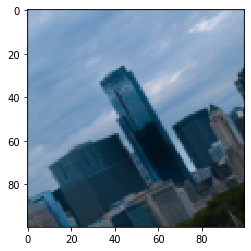

In [25]:
# desired shape
img_shp_desired = (100, 100, 3)
img_resized = resize(img_cropped_2, img_shp_desired, mode='constant')
plt.imshow(img_resized);